In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import platform
import random
import math
import datetime

In [30]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [31]:
# 1 + 4 = 5
# 23 + 51 = 74

In [32]:
dataset_size = 5000
sequence_length = 2
max_num = 100

In [33]:
# summation 생성 함수
def generate_sums(dataset_size, sequence_length, max_num):
  # 데이터셋
  x, y = [], []

  for i in range(dataset_size):
    sequence = [random.randint(1, max_num) for _ in range(sequence_length)]
    x.append(sequence)
    y.append(sum(sequence))

  return x, y

In [34]:
x_train, y_train = generate_sums(dataset_size=dataset_size,
                                 sequence_length=sequence_length,
                                 max_num=max_num)

In [35]:
print('x_train : \n', x_train[:5])
print('y_train : \n', y_train[:5])

x_train : 
 [[22, 26], [88, 69], [4, 96], [74, 18], [75, 59]]
y_train : 
 [48, 157, 100, 92, 134]


In [36]:
# 실제 input -> 13+8, 85+91
# x, y를 문자열로 변환
# 공백과 + 를 추가해주고 패딩을 넣어서 같은 길이로 맞춤
def dataset_to_strings(x, y, max_num):
  x_str, y_str = [], []

  sequence_length = len(x[0])

  # 최대 x 길이 계산
  num_of_pluses = sequence_length - 1
  num_of_chars_per_digit = math.ceil(math.log10(max_num + 1))
  max_x_length = sequence_length * num_of_chars_per_digit + num_of_pluses

  # 최대 y 길이 계산
  max_y_length = math.ceil(math.log10(sequence_length * (max_num + 1)))

  # 문자열 길이를 맞추기 위해 공백 추가
  for exp in x:
    str_exp = '+'.join([str(digit) for digit in exp])
    str_exp += ''.join([' ' for padding in range(max_x_length - len(str_exp))])
    x_str.append(str_exp)

  # 라벨 길이를 맞춤
  for label in y:
    str_exp = str(label)
    str_exp += ''.join([' ' for padding in range(max_y_length - len(str_exp))])
    y_str.append(str_exp)

  return x_str, y_str

In [53]:
x_train_str, y_train_str = dataset_to_strings(x_train, y_train, max_num)

In [54]:
print('x_train_str: \n', np.array(x_train_str[:5]))
print('y_train_str: \n', np.array(y_train_str[:5]))

x_train_str: 
 ['22+26  ' '88+69  ' '4+96   ' '74+18  ' '75+59  ']
y_train_str: 
 ['48 ' '157' '100' '92 ' '134']


In [55]:
vocabulary = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', ' ']

In [56]:
char_to_idx = { char: idx for idx, char in enumerate(vocabulary) }
char_to_idx

{' ': 11,
 '+': 10,
 '0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [57]:
def dataset_to_indices(x, y, vocabulary):
  x_encoded, y_encoded = [], []

  # char_to_idx 이용하여 문자를 idx로 변환
  for exp in x:
    exp_encoded = [char_to_idx[char] for char in exp]
    x_encoded.append(exp_encoded)

  for label in y:
    label_encoded = [char_to_idx[char] for char in label]
    y_encoded.append(label_encoded)

  return x_encoded, y_encoded

In [58]:
x_train_encoded, y_train_encoded = dataset_to_indices(
    x_train_str,
    y_train_str,
    vocabulary
)

In [59]:
print('x_train_encoded : \n', np.array(x_train_encoded[:5]))
print('y_train_encoded : \n', np.array(y_train_encoded[:5]))

x_train_encoded : 
 [[ 2  2 10  2  6 11 11]
 [ 8  8 10  6  9 11 11]
 [ 4 10  9  6 11 11 11]
 [ 7  4 10  1  8 11 11]
 [ 7  5 10  5  9 11 11]]
y_train_encoded : 
 [[ 4  8 11]
 [ 1  5  7]
 [ 1  0  0]
 [ 9  2 11]
 [ 1  3  4]]


In [60]:
# one hot encoding
def dataset_to_onehot(x, y, vocabulary):

  x_encoded, y_encoded = [], []

  for exp in x:
    pattern = []
    for idx in exp:
      vector = [0 for _ in range(len(vocabulary))]
      vector[idx] = 1
      pattern.append(vector)
    x_encoded.append(pattern)

  for label in y:
    pattern = []
    for idx in label:
      vector = [0 for _ in range(len(vocabulary))]
      vector[idx] = 1
      pattern.append(vector)

    y_encoded.append(pattern)

  return x_encoded, y_encoded

In [61]:
x_train_one_hot, y_train_one_hot = dataset_to_onehot(
    x_train_encoded,
    y_train_encoded,
    vocabulary
)

In [62]:
print('x_train_one_hot: \n', np.array(x_train_one_hot[:3]))
print('y_train_one_hot: \n', np.array(y_train_one_hot[:3]))

x_train_one_hot: 
 [[[0 0 1 0 0 0 0 0 0 0 0 0]
  [0 0 1 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 1 0]
  [0 0 1 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 1 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 1]]

 [[0 0 0 0 0 0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 1 0]
  [0 0 0 0 0 0 1 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 1 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 1]]

 [[0 0 0 0 1 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 1 0]
  [0 0 0 0 0 0 0 0 0 1 0 0]
  [0 0 0 0 0 0 1 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 1]]]
y_train_one_hot: 
 [[[0 0 0 0 1 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 1]]

 [[0 1 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 1 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0 0 0]]]


In [63]:
def generate_dataset(dataset_size, sequence_length, max_num, vocabulary):
  x, y = generate_sums(dataset_size, sequence_length, max_num)

  x, y = dataset_to_strings(x, y, max_num)

  x, y = dataset_to_indices(x, y, vocabulary)

  x, y = dataset_to_onehot(x, y, vocabulary)

  return np.array(x), np.array(y) 

In [64]:
x, y = generate_dataset(
    dataset_size,
    sequence_length,
    max_num,
    vocabulary
)

In [65]:
x.shape, y.shape

((5000, 7, 12), (5000, 3, 12))

In [66]:
def decode(seq, vocabulary):
  idx_to_char = { idx : char for idx, char in enumerate(vocabulary)}
  strings = []

  for char_vector in seq:
    char = idx_to_char[np.argmax(char_vector)]
    strings.append(char)

  return ''.join(strings)

In [67]:
decode(y[0], vocabulary)

'97 '

In [69]:
EPOCHS_NUM = 200
BATCH_SIZE = 128

In [70]:
input_sequence_length = x.shape[1]
output_sequence_length = y.shape[1]
supported_symbols_num = x.shape[2]
vocabulary_size = len(vocabulary)

In [74]:

model = tf.keras.models.Sequential([
  # encoder
  tf.keras.layers.LSTM(units=128, 
                       input_shape=(input_sequence_length, vocabulary_size),
                       recurrent_initializer=tf.keras.initializers.GlorotNormal()
                       ),

  # decoder
  tf.keras.layers.RepeatVector(
      n = output_sequence_length,
  ),

  tf.keras.layers.LSTM(units=128,
                       return_sequences=True,
                       recurrent_initializer = tf.keras.initializers.GlorotNormal()
                       ),

  tf.keras.layers.TimeDistributed(
      layer=tf.keras.layers.Dense(units=vocabulary_size)
  ),

  tf.keras.layers.Activation(
      activation='softmax'
  )
])

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               72192     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 3, 128)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 3, 128)            131584    
_________________________________________________________________
time_distributed (TimeDistri (None, 3, 12)             1548      
_________________________________________________________________
activation (Activation)      (None, 3, 12)             0         
Total params: 205,324
Trainable params: 205,324
Non-trainable params: 0
_________________________________________________________________


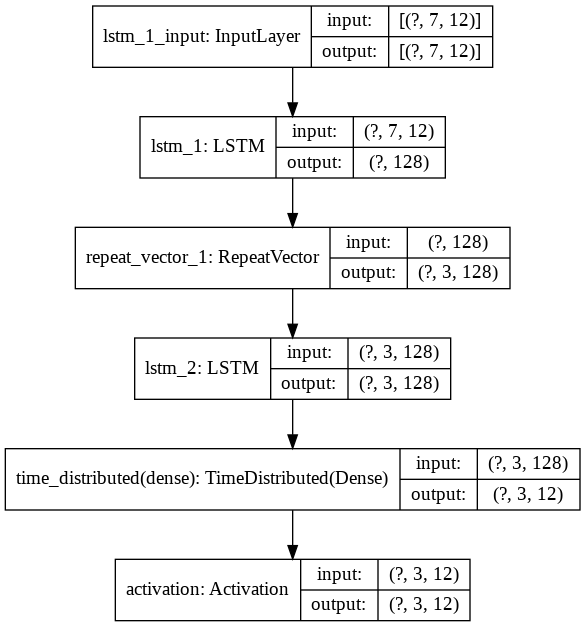

In [77]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True
)

In [82]:
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [83]:
history = model.fit(
    x=x, y=y,
    epochs=EPOCHS_NUM, batch_size=BATCH_SIZE,
    validation_split=0.1
)

Epoch 1/200
36/36 [==============================] - 2s 54ms/step - loss: 2.3182 - accuracy: 0.2256 - val_loss: 2.1462 - val_accuracy: 0.3653
Epoch 2/200
36/36 [==============================] - 1s 34ms/step - loss: 1.9714 - accuracy: 0.3786 - val_loss: 1.8726 - val_accuracy: 0.3767
Epoch 3/200
36/36 [==============================] - 1s 34ms/step - loss: 1.8121 - accuracy: 0.3859 - val_loss: 1.7774 - val_accuracy: 0.3807
Epoch 4/200
36/36 [==============================] - 1s 34ms/step - loss: 1.7530 - accuracy: 0.3890 - val_loss: 1.7297 - val_accuracy: 0.3847
Epoch 5/200
36/36 [==============================] - 1s 34ms/step - loss: 1.7190 - accuracy: 0.3923 - val_loss: 1.7046 - val_accuracy: 0.3833
Epoch 6/200
36/36 [==============================] - 1s 34ms/step - loss: 1.6914 - accuracy: 0.4039 - val_loss: 1.6848 - val_accuracy: 0.3993
Epoch 7/200
36/36 [==============================] - 1s 35ms/step - loss: 1.6635 - accuracy: 0.4077 - val_loss: 1.6687 - val_accuracy: 0.4087
Epoch 

In [89]:
def render_train_history(training_history):
  loss = training_history.history['loss']
  val_loss = training_history.history['val_loss']

  acc = training_history.history['accuracy']
  val_acc = training_history.history['val_accuracy']

  plt.figure(figsize=(14, 4))

  plt.subplot(1,2, 1)
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(loss, label='Training set')
  plt.plot(val_loss, label='Test set', linestyle='--')
  plt.legend()
  plt.grid(linestyle='--', linewidth=1, alpha=0.5)

  plt.subplot(1, 2, 2)
  plt.title('Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(acc, label='Training set')
  plt.plot(val_acc, label='Test set', linestyle='--')
  plt.legend()
  plt.grid(linestyle='--', linewidth=1, alpha=0.5)

  plt.show()


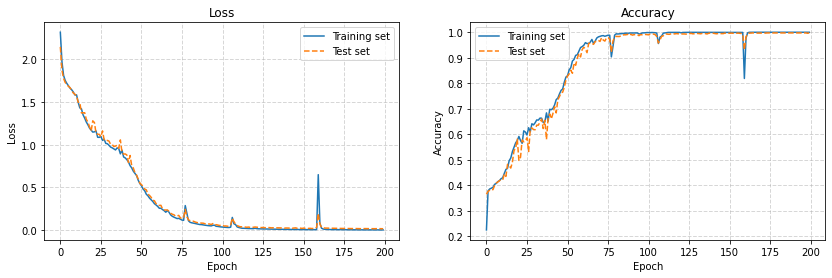

In [90]:
render_train_history(history)

In [91]:
x_test, y_test = generate_dataset(dataset_size,
                                  sequence_length,
                                  max_num,
                                  vocabulary)

In [92]:
predictions = model.predict(x_test)

In [93]:
x_encoded = [decode(exp, vocabulary) for exp in x_test]
y_expected = [decode(label, vocabulary) for label in y_test]
y_predicted = [decode(prediction, vocabulary) for prediction in predictions]

In [94]:
explore_num = 40
for exp, label, pred in list(zip(x_encoded, y_expected, y_predicted))[:explore_num]:
  chkmark = '정답' if label == pred else ''
  print('{} = {} [predict: {}] {}'.format(exp, label, pred, chkmark))

18+86   = 104 [predict: 104] 정답
87+80   = 167 [predict: 167] 정답
28+85   = 113 [predict: 113] 정답
75+95   = 170 [predict: 170] 정답
60+92   = 152 [predict: 152] 정답
27+84   = 111 [predict: 111] 정답
99+32   = 131 [predict: 131] 정답
91+65   = 156 [predict: 156] 정답
22+62   = 84  [predict: 84 ] 정답
83+87   = 170 [predict: 170] 정답
27+10   = 37  [predict: 37 ] 정답
59+35   = 94  [predict: 94 ] 정답
83+65   = 148 [predict: 148] 정답
31+67   = 98  [predict: 98 ] 정답
70+92   = 162 [predict: 162] 정답
93+6    = 99  [predict: 99 ] 정답
95+3    = 98  [predict: 98 ] 정답
8+24    = 32  [predict: 32 ] 정답
32+13   = 45  [predict: 45 ] 정답
61+96   = 157 [predict: 157] 정답
73+71   = 144 [predict: 144] 정답
51+8    = 59  [predict: 59 ] 정답
21+71   = 92  [predict: 92 ] 정답
93+59   = 152 [predict: 152] 정답
8+28    = 36  [predict: 36 ] 정답
88+68   = 156 [predict: 156] 정답
48+24   = 72  [predict: 72 ] 정답
55+17   = 72  [predict: 72 ] 정답
76+73   = 149 [predict: 149] 정답
19+97   = 116 [predict: 116] 정답
41+99   = 140 [predict: 140] 정답
52+33   